<a href="https://colab.research.google.com/github/Chung-god/ComputerVision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.datasets import cifar10
import random
from google.colab.patches import cv2_imshow

In [2]:
#cifar10에서 데이터 로드 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
alist=[]
for i in range(100):
  a = random.randint(1,50000)
  while a in alist:
    a = random.randint(1,50000)
  alist.append(a)

print(alist)

[29741, 17942, 41370, 13239, 30998, 27036, 16648, 35277, 18798, 36732, 15383, 34711, 15505, 18650, 36051, 45069, 10554, 25256, 42964, 28449, 34562, 29207, 26761, 38357, 23835, 43806, 22399, 48515, 34545, 10060, 40330, 13879, 16430, 27738, 25525, 44668, 26423, 46517, 32007, 19293, 13772, 166, 41421, 28123, 22042, 25401, 17754, 14886, 36389, 36697, 41584, 25106, 43707, 18899, 20905, 28914, 29490, 39868, 31813, 12388, 15366, 12842, 40535, 22936, 41435, 12427, 18432, 39204, 49321, 15545, 609, 7170, 37158, 27678, 43891, 11122, 15965, 26164, 34650, 20678, 46402, 42261, 126, 22493, 47162, 48559, 41768, 42310, 4325, 47521, 44782, 49718, 14858, 38878, 35000, 30888, 4464, 5079, 14756, 41251]


In [4]:
#정규화
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

#원핫코드
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]



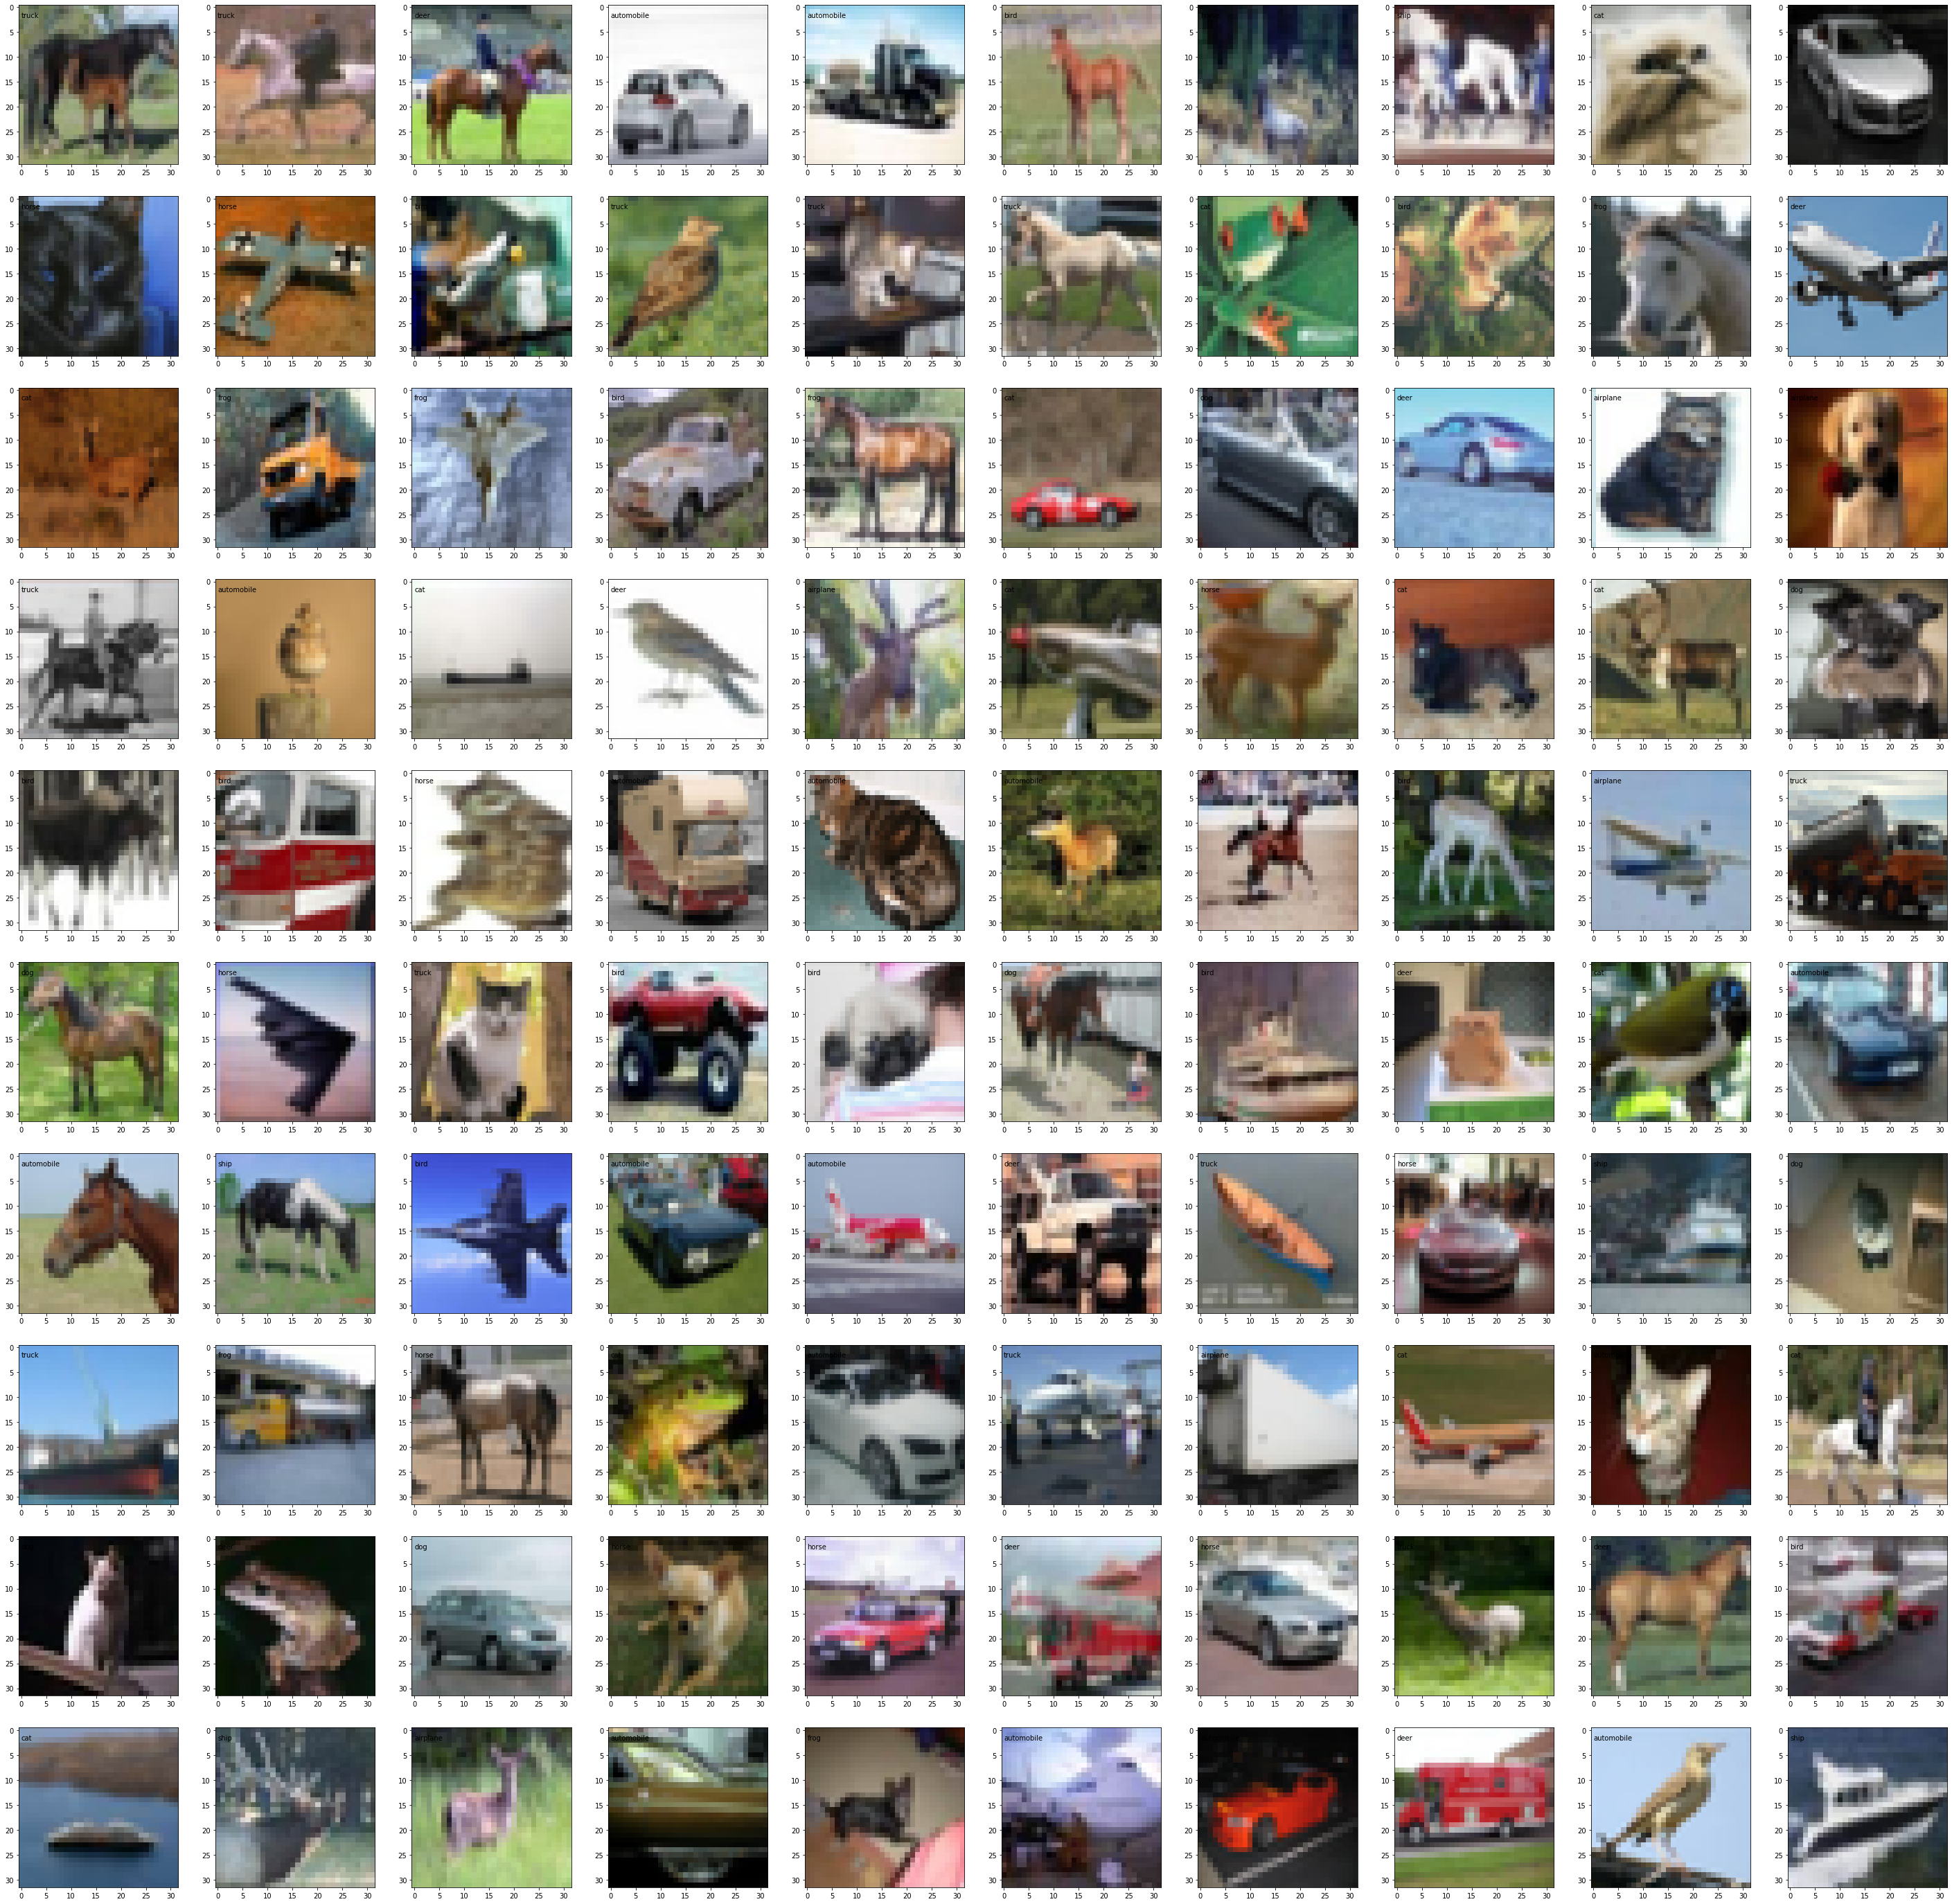

In [14]:
#random 100 train data
fig = plt.figure()
plt.rcParams['figure.figsize'] = [100,100]
rows = 10
cols = 10
i = 1
labels = ['airplane','automobile','bird','cat','deer','dog', 'frog', 'horse', 'ship', 'truck']

for index in alist:
  ax = fig.add_subplot(rows,cols,i)
  ax.imshow(X_train[index])
  # plt.text(0,2,'Prediction: ' + labels[np.argmax(output)] + ' / Answer: ' + labels[np.argmax(y_test[i])])
  plt.text(0,2,labels[np.argmax(y_train[i])])
  # print(np.argmax(X_train[index])
  i = i + 1

plt.show()


In [6]:
#  모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')

model.add(Conv2D(filters=32, kernel_size=5, activation='relu',input_shape=(width, height, channel)))
model.add(Conv2D(filters=63, kernel_size=5, activation='relu'))

model.add(MaxPool2D())
model.add(Conv2D(filters=128, kernel_size=5,activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))


# N차원 배열을 1차원
model.add(Flatten())

# 128개의 노드를 가진 층
model.add(Dense(128, activation='softmax'))

#은닉층에 배치된 노드 중 30%를 임의로 끔
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.build(input_shape=(None,width, height, channel))
model.summary()


Model: "CIFAR10_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 28, 28, 32)        2432      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 24, 24, 63)        50463     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 63)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 8, 8, 128)         201728    
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          

In [7]:
#모델 컴파일 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "CIFAR10_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 28, 28, 32)        2432      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 24, 24, 63)        50463     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 63)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 8, 8, 128)         201728    
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          

In [8]:
#모델 설정 및 학습 
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,validation_split=0.2)
model.summary()

Epoch 1/10
625/625 [==============================] - 358s 547ms/step - loss: 2.2417 - accuracy: 0.1498 - val_loss: 2.0990 - val_accuracy: 0.2154
Epoch 2/10
625/625 [==============================] - 345s 551ms/step - loss: 2.0978 - accuracy: 0.1899 - val_loss: 1.9962 - val_accuracy: 0.2532
Epoch 3/10
625/625 [==============================] - 344s 550ms/step - loss: 2.0213 - accuracy: 0.2184 - val_loss: 1.8960 - val_accuracy: 0.3027
Epoch 4/10
625/625 [==============================] - 342s 547ms/step - loss: 1.9458 - accuracy: 0.2587 - val_loss: 1.7989 - val_accuracy: 0.3712
Epoch 5/10
625/625 [==============================] - 341s 546ms/step - loss: 1.8519 - accuracy: 0.3129 - val_loss: 1.6765 - val_accuracy: 0.4467
Epoch 6/10
625/625 [==============================] - 342s 547ms/step - loss: 1.7447 - accuracy: 0.3745 - val_loss: 1.5768 - val_accuracy: 0.4803
Epoch 7/10
625/625 [==============================] - 341s 546ms/step - loss: 1.6671 - accuracy: 0.4100 - val_loss: 1.4617 -

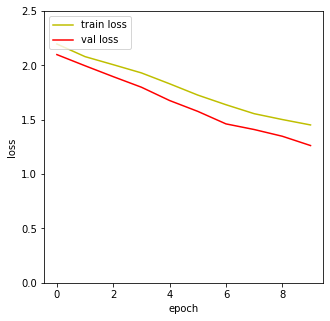

In [12]:
plt.rcParams['figure.figsize'] = [5,5]

# Training Loss VS Validation Loss  그래프 그리기 
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

# y축 범위 설정
plt.ylim([0.0, 2.5])

# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')




# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

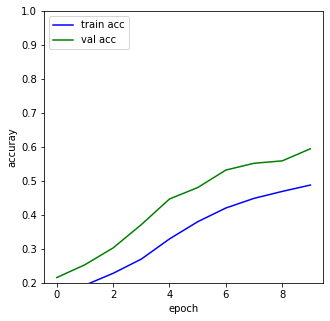

In [10]:
# Training Accuracy VS Validation Accuracy 그래프 그리기 
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')
plt.ylim([0.2, 1.0])
plt.xlabel('epoch')
plt.ylabel('accuray')
plt.legend(loc='upper left')
plt.show()

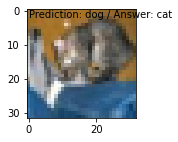

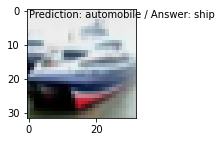

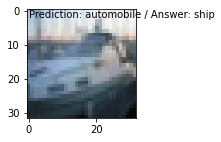

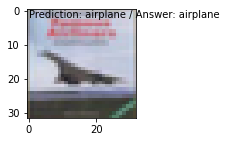

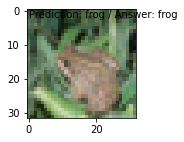

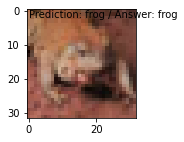

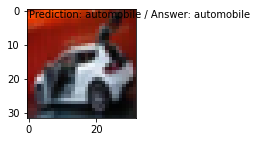

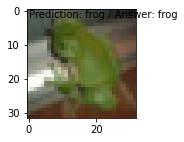

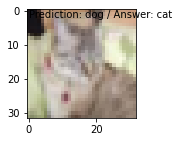

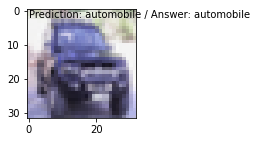

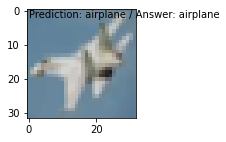

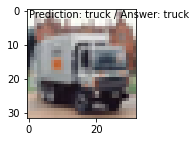

In [11]:
#모델 사용
labels = ['airplane','automobile','bird','cat','deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 12개
for i in range(12):
  output = model.predict(X_test[i].reshape(1,width, height, channel))

  plt.text(0,2,'Prediction: ' + labels[np.argmax(output)] + ' / Answer: ' + labels[np.argmax(y_test[i])])

  # 이미지 출력 
  plt.imshow(X_test[i].reshape(width, height, channel))
  plt.show()